In [62]:
from imutils import paths
import numpy as np
import imutils
import cv2
import os

import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sn

from imutils import paths

from sklearn.model_selection import train_test_split

In [63]:
def load_db(path):
    test_datagen = ImageDataGenerator(vertical_flip=True,rotation_range=0.3)

    ds_test = test_datagen.flow_from_directory(
    path,
    target_size = (128,128),
    batch_size = 4,
    class_mode = 'sparse')
    return ds_test

In [64]:
# This function appears to define an ImageDataGenerator object called "test_datagen" with the parameters "vertical_flip" set to true and "rotation_range" set to 0.3. It then uses this generator to create a dataset, "ds_test," from a directory located at the specified "path" with images resized to 128x128 pixels and a batch size of 4. 
# The class mode is set to 'sparse'. The function then returns the ds_test dataset.

In [65]:
def face_detection(image):
    cascadePath = "haarcascade_frontalface_default.xml"
    detector = cv2.CascadeClassifier(cascadePath)

    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    rects = detector.detectMultiScale(gray, scaleFactor=1.05,
    minNeighbors=10, minSize=(30, 30),
    flags=cv2.CASCADE_SCALE_IMAGE)

    return rects

In [66]:
# This function appears to perform face detection on an image using the Haar cascade classifier algorithm. The path to the XML file containing the Haar cascade classifier is specified as "cascadePath", and the classifier is loaded into the "detector" object. The image is then converted to grayscale and passed to the detector's "detectMultiScale" method, along with the scale factor, minimum number of neighbors, minimum size of the detection, and flags for the detection. 
# This method returns a list of rectangles (x, y, width, height) where the faces are detected in the image.

In [67]:
def load_face_dataset(inputPath, minSamples = 15):
  # get all the image paths in the dataset folder structure and grab 
  # the name(i.e. groundtruth) of all the images and count each of them
  # and then put all of the groundtruths into a list
  imagePaths = list(paths.list_images(inputPath))
  names = [p.split(os.path.sep)[-2] for p in imagePaths]
  (names , counts) = np.unique(names , return_counts = True)
  names = names.tolist()

  faces = []
  labels = []

  # loop over all of the image paths
  for imagePath in imagePaths:
    # read the image and grab the image label
    image = cv2.imread(imagePath)
    name = imagePath.split(os.path.sep)[-2]

    # check whether the count of this specific label is
    # below our minSamples threshold or not
    if counts[names.index(name)] < minSamples:
      continue
    
    # perform face detection
    boxes = face_detection(image)
    
    # loop over the bounding boxes
    for (x , y , w , h) in boxes:
      try:
        # extract the face ROI, resize it and convert
        # it into grayscale format
        faceROI = image[y:y+h , x:x+w]
        faceROI = cv2.resize(faceROI , (47 , 62))
        faceROI = cv2.cvtColor(faceROI , cv2.COLOR_BGR2GRAY)

        # update the faces and labels list
        faces.append(faceROI)
        labels.append(name)
      except:
        continue
  # convert the faces and labels lists into Numpy array
  faces = np.array(faces)
  labels = np.array(labels)

  return (faces , labels)

In [68]:
(faces , labels) = load_face_dataset("Dataset - Equipe Maroc")
labels

array(['aguerd', 'aguerd', 'aguerd', 'aguerd', 'aguerd', 'aguerd',
       'aguerd', 'aguerd', 'aguerd', 'aguerd', 'aguerd', 'aguerd',
       'aguerd', 'aguerd', 'aguerd', 'Anass Zeroury', 'Anass Zeroury',
       'Anass Zeroury', 'Anass Zeroury', 'Anass Zeroury', 'Anass Zeroury',
       'Anass Zeroury', 'Anass Zeroury', 'Anass Zeroury', 'Anass Zeroury',
       'Anass Zeroury', 'Anass Zeroury', 'Anass Zeroury', 'Anass Zeroury',
       'Anass Zeroury', 'Anass Zeroury', 'Anass Zeroury', 'Anass Zeroury',
       'Anass Zeroury', 'Anass Zeroury', 'Anass Zeroury', 'Anass Zeroury',
       'Anass Zeroury', 'boukhlal', 'boukhlal', 'boukhlal', 'boukhlal',
       'boukhlal', 'boukhlal', 'boukhlal', 'boukhlal', 'boukhlal',
       'boukhlal', 'boukhlal', 'boukhlal', 'boukhlal', 'boukhlal',
       'boukhlal', 'boukhlal', 'boukhlal', 'boukhlal', 'boukhlal',
       'boukhlal', 'photo hakimi', 'photo hakimi', 'photo hakimi',
       'photo hakimi', 'photo hakimi', 'photo hakimi', 'photo hakimi',
       'p

In [69]:
faces.shape

(147, 62, 47)

In [70]:
labels.shape

(147,)

In [71]:
imagePaths = list(paths.list_images('Dataset - Equipe Maroc'))
names = [p.split(os.path.sep)[-2] for p in imagePaths]
(names , counts) = np.unique(names , return_counts = True)
names = names.tolist()
names

['Anass Zeroury',
 'Walid Reguragui',
 'YassineBono',
 'aguerd',
 'boukhlal',
 'photo hakimi',
 'saiss']

In [72]:
import import_ipynb
import matplotlib.pyplot as plt
from skimage import feature
import numpy as np
import cv2
import os

In [73]:
class LocalBinaryPatterns:
  def __init__(self , numPoints , radius):
    self.numPoints = numPoints
    self.radius = radius

  def describe(self , image , eps=1e-7):
    lbp = feature.local_binary_pattern(image , self.numPoints , self.radius)
    hist = plt.hist(lbp.ravel())
    return lbp , hist

In [74]:
# This function appears to read image files from a directory and use the Haar cascade classifier to detect faces in the images. It first retrieves all the image paths from the inputPath directory and extracts the name(i.e. groundtruth) of all the images, and count each of them, and then put all of the groundtruths into a list.
# It then loops over all of the image paths and performs face detection on each image using the "face_detection" function. If the count of a specific label is below the minSamples threshold, the loop skips that image.
# It then loops over the bounding boxes returned by the "face_detection" function, extracts the face ROI, resizes it, converts it into grayscale format and updates the 'faces' and 'labels' list.
# Finally, it converts the 'faces' and 'labels' lists into Numpy arrays and returns them as a tuple.





In [75]:
desc = LocalBinaryPatterns(16, 5)

def preprocess_img(imagePath):
  img = cv2.imread(imagePath)
  rects = face_detection(img)
  for (x , y , w , h) in rects:
    face = img[y:y+h , x:x+w]

  face = cv2.cvtColor(face, cv2.COLOR_BGR2GRAY)
  # plt.imshow(face , cmap="gray")
  # print(face.shape)
  # face = np.array(face)
  
  lbp , hist = desc.describe(face)
  return lbp , hist

In [76]:
imagePath = "Dataset - Equipe Maroc/aguerd/5_1.jpg"

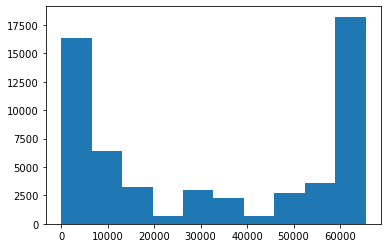

In [77]:
lbp , hist = preprocess_img(imagePath)

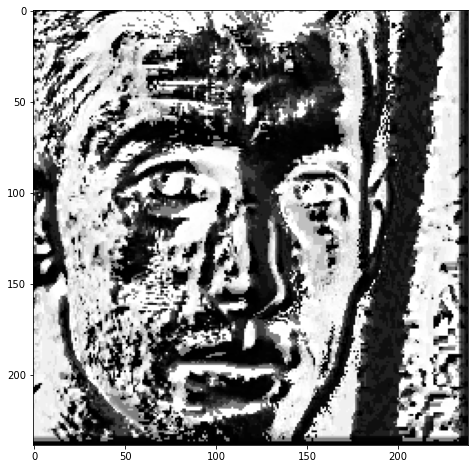

In [78]:
plt.figure(figsize=(8,8))
plt.imshow(lbp , cmap="gray")

In [79]:
import import_ipynb
#from face import load_face_dataset

from sklearn.metrics import f1_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np
import math
import imutils
import time
import cv2
import os

In [80]:
def cross_validation(input_data , cv = 5 , test_size = 0.5 , output = True , save_model=False):

  # initialize the f1-scores list
  f1_scores = []
  # grab some random numbers between 0 and 100
  random_states = np.random.randint(low = 0, high = 100 , size = cv , dtype = int)

  # extract faces and label from dataset
  (faces , labels) = load_face_dataset(input_data , minSamples=15)

  # encode the labels
  le = LabelEncoder()
  labels = le.fit_transform(labels)

  # do the training process based on the number of 
  # random_states
  for random_state in random_states:
    # split the data into training and test set
    X_train , X_test , y_train , y_test = train_test_split(faces , labels , test_size = test_size,
                                                          stratify = labels , random_state = random_state)
    
    # define and train the LBP model
    recognizer = cv2.face.LBPHFaceRecognizer_create(
        radius = 2 , neighbors = 16 , grid_x = 9 , grid_y  = 9)

    recognizer.train(X_train , y_train)

    # initialize our predictions and confidence lists
    predictions = []
    confidence = []

    # loop over the test data
    for i in range(0 , len(X_test)):
      # classify the face and update the predictions
      # and confidence scores
      (prediction , confidence) = recognizer.predict(X_test[i])
      predictions.append(prediction)
      confidence.append(confidence)

    # collect and append the calculated f1-score based on this
    # random state
    f1_scores.append(f1_score(y_test,predictions,average="macro"))

  # convert the f1-scores list into Numpy array
  f1_scores = np.array(f1_scores , dtype="float32")

  if output:
    # generate a sample of testing data
    idxs = np.random.choice(range(0 , len(X_test)) , size = 10 , replace = True)

    for i in idxs:
      # grab the actual and predicted name
      predName = le.inverse_transform([predictions[i]])[0]
      actualName = le.classes_[y_test[i]]

      # grab the face image, convert back it from 1 channel
      # into 3 channels and then resize it
      face = np.dstack([X_test[i]] * 3)
      face = imutils.resize(face , width = 250)

      # draw the actual and predicted name on the image
      cv2.putText(face , "actual : {}".format(actualName) , (5 , 25),
                  cv2.FONT_HERSHEY_SIMPLEX , 0.8 , (0 , 0 , 255) , 2)
      cv2.putText(face , "prediction : {}".format(predName) , (5 , 60),
                  cv2.FONT_HERSHEY_SIMPLEX , 0.8 , (0 , 255 , 0) , 2)
      
      # display the result image and the save it into
      # the desired directory 
      plt.imshow(face , cmap="gray")
      plt.savefig("face-{}.png".format(i))
    # save the model 
  
  if save_model:
    # save the model 
    recognizer.save("face-recognizer-model.yml")

  return f1_scores

In [81]:
labels

array(['aguerd', 'aguerd', 'aguerd', 'aguerd', 'aguerd', 'aguerd',
       'aguerd', 'aguerd', 'aguerd', 'aguerd', 'aguerd', 'aguerd',
       'aguerd', 'aguerd', 'aguerd', 'Anass Zeroury', 'Anass Zeroury',
       'Anass Zeroury', 'Anass Zeroury', 'Anass Zeroury', 'Anass Zeroury',
       'Anass Zeroury', 'Anass Zeroury', 'Anass Zeroury', 'Anass Zeroury',
       'Anass Zeroury', 'Anass Zeroury', 'Anass Zeroury', 'Anass Zeroury',
       'Anass Zeroury', 'Anass Zeroury', 'Anass Zeroury', 'Anass Zeroury',
       'Anass Zeroury', 'Anass Zeroury', 'Anass Zeroury', 'Anass Zeroury',
       'Anass Zeroury', 'boukhlal', 'boukhlal', 'boukhlal', 'boukhlal',
       'boukhlal', 'boukhlal', 'boukhlal', 'boukhlal', 'boukhlal',
       'boukhlal', 'boukhlal', 'boukhlal', 'boukhlal', 'boukhlal',
       'boukhlal', 'boukhlal', 'boukhlal', 'boukhlal', 'boukhlal',
       'boukhlal', 'photo hakimi', 'photo hakimi', 'photo hakimi',
       'photo hakimi', 'photo hakimi', 'photo hakimi', 'photo hakimi',
       'p

In [82]:
from skimage.transform import rotate
from skimage.feature import local_binary_pattern

def extractLBP(image):
    # settings for LBP
    radius = 5
    n_points = 8 * radius

    lbp = local_binary_pattern(image, n_points, radius)
    return lbp

In [83]:
# This function appears to extract local binary pattern (LBP) features from an image using the "local_binary_pattern" function from the "skimage.feature" module. It first sets the radius and number of points of the LBP operator using the radius variable and the n_points variable. Then, it applies the LBP operator to the image using the "local_binary_pattern" function, passing in the image, n_points, and radius. The function then returns the resulting LBP image.
# It is important to mention that LBP is a texture descriptor that is used to extract features from images, it works by comparing the intensity of a central pixel with the intensities of its surrounding pixels, it encodes the comparison in a binary code.

In [84]:
len(faces)

147

In [85]:
def extractLPBDB(images) :
    listLBP = []
    for i in range(len(images)) :
        lbp = extractLBP(images[i])
        listLBP.append(lbp)
    return listLBP

In [86]:
faces.shape

(147, 62, 47)

In [87]:
def extractLPBDB(images) :
    listLBP = []
    for i in range(len(images)) :
        lbp = feature.local_binary_pattern(images[i], 16 , 5)
        listLBP.append(lbp)
    return listLBP


In [88]:
listLBP = extractLPBDB(faces)

In [89]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(listLBP, labels, test_size=0.15, random_state=100, shuffle=True)

In [90]:
# This line appears to be splitting the data into training and testing sets using the "train_test_split" function from the "sklearn.model_selection" module.
# It takes four arguments :

# listLBP: the data to be split, which appears to be a list of Local Binary Patterns (LBP) features.
# labels: the ground truth labels for the images from which the LBP features were extracted.
# test_size: the proportion of the data that will be used for testing (0.20 means 20% of the data will be used for testing and 80% for training)

In [91]:
labels


array(['aguerd', 'aguerd', 'aguerd', 'aguerd', 'aguerd', 'aguerd',
       'aguerd', 'aguerd', 'aguerd', 'aguerd', 'aguerd', 'aguerd',
       'aguerd', 'aguerd', 'aguerd', 'Anass Zeroury', 'Anass Zeroury',
       'Anass Zeroury', 'Anass Zeroury', 'Anass Zeroury', 'Anass Zeroury',
       'Anass Zeroury', 'Anass Zeroury', 'Anass Zeroury', 'Anass Zeroury',
       'Anass Zeroury', 'Anass Zeroury', 'Anass Zeroury', 'Anass Zeroury',
       'Anass Zeroury', 'Anass Zeroury', 'Anass Zeroury', 'Anass Zeroury',
       'Anass Zeroury', 'Anass Zeroury', 'Anass Zeroury', 'Anass Zeroury',
       'Anass Zeroury', 'boukhlal', 'boukhlal', 'boukhlal', 'boukhlal',
       'boukhlal', 'boukhlal', 'boukhlal', 'boukhlal', 'boukhlal',
       'boukhlal', 'boukhlal', 'boukhlal', 'boukhlal', 'boukhlal',
       'boukhlal', 'boukhlal', 'boukhlal', 'boukhlal', 'boukhlal',
       'boukhlal', 'photo hakimi', 'photo hakimi', 'photo hakimi',
       'photo hakimi', 'photo hakimi', 'photo hakimi', 'photo hakimi',
       'p

In [92]:
X_train1 = np.array(X_train1) 
X_test1 = np.array(X_test1) 

In [93]:
X_train1.shape

(124, 62, 47)

In [94]:
x_train_flattened1 = X_train1.reshape(len(X_train1),62*47)
x_test_flattened1 = X_test1.reshape(len(X_test1),62*47)

In [95]:
x_train_flattened1.shape

(124, 2914)

In [96]:
# Create a KNN classifier
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=7)
# Train the classifier using the training data
knn.fit(x_train_flattened1, y_train1)


KNeighborsClassifier(n_neighbors=7)

In [97]:
# This code creates an instance of the KNeighborsClassifier class from the "sklearn.neighbors" module and assigns it to the variable "knn". 
# The k-nearest neighbors (KNN) algorithm is being used to classify the input data. The number of neighbors to consider when determining the class of a point is specified using the "n_neighbors" parameter and set to 7.

In [98]:
# Test the classifier using the test data
accuracy = knn.score(x_train_flattened1,y_train1)
print('Accuracy:', accuracy)

Accuracy: 0.6370967741935484


In [99]:
# Test the classifier using the test data
accuracy = knn.score(x_test_flattened1,y_test1)
print('Accuracy:', accuracy)

Accuracy: 0.6521739130434783


In [100]:

image=faces[120]
image_features = feature.local_binary_pattern( image, 16 , 5)
image_features = image_features.reshape(1,62*47)


In [101]:
joueur=knn.predict(image_features)

In [102]:
joueur

array(['Walid Reguragui'], dtype='<U15')

In [103]:
image.shape

(62, 47)

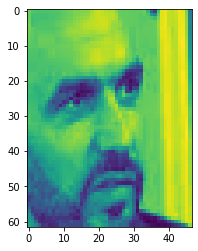

In [104]:
plt.imshow(image)

In [105]:
image.shape


(62, 47)

In [106]:
image="C:\\Users\\dell\\OneDrive\\Images\\Bureau\\Hakimi-1.jpg"
image=cv2.imread(image)
boxes = face_detection(image)
for (x , y , w , h) in boxes:
        faceROI = image[y:y+h , x:x+w]
        faceROI = cv2.resize(faceROI , (47 , 62))
        faceROI = cv2.cvtColor(faceROI , cv2.COLOR_BGR2GRAY)
        
image_features = feature.local_binary_pattern( faceROI, 16 , 5)
image_features = image_features.reshape(1,62*47)

In [107]:
joueur=knn.predict(image_features)

In [108]:
joueur

array(['photo hakimi'], dtype='<U15')

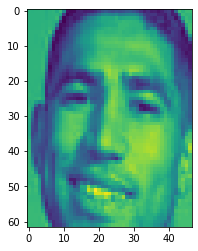

In [109]:
plt.imshow(faceROI)

In [110]:
image="C:\\Users\\dell\\OneDrive\\Images\\Bureau\\491296-1626771045.webp"
image=cv2.imread(image)
boxes = face_detection(image)
for (x , y , w , h) in boxes:
        faceROI = image[y:y+h , x:x+w]
        faceROI = cv2.resize(faceROI , (47 , 62))
        faceROI = cv2.cvtColor(faceROI , cv2.COLOR_BGR2GRAY)
        
image_features = feature.local_binary_pattern( faceROI, 16 , 5)
image_features = image_features.reshape(1,62*47)

In [111]:
joueur=knn.predict(image_features)

In [112]:
joueur

array(['Anass Zeroury'], dtype='<U15')

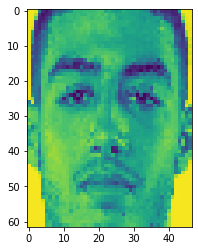

In [113]:
plt.imshow(faceROI)

In [137]:
from sklearn.preprocessing import LabelEncoder
def encode(labels):
    le = LabelEncoder()
    labels = le.fit_transform(labels)
    return labels

In [140]:
labels = encode(labels)
labels

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int64)

In [164]:
listLBP

[array([[0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 8.1920e+03, 6.1440e+03,
         4.0960e+03],
        [0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 1.6128e+04, 4.0960e+03,
         0.0000e+00],
        [0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00, 0.0000e+00,
         0.0000e+00],
        ...,
        [3.2799e+04, 3.2775e+04, 3.2831e+04, ..., 7.2800e+02, 6.5600e+02,
         9.4400e+02],
        [7.0000e+00, 3.1000e+01, 1.5000e+01, ..., 2.1600e+02, 2.4000e+02,
         4.3200e+02],
        [7.0000e+00, 3.1000e+01, 1.5000e+01, ..., 4.7200e+02, 4.9600e+02,
         4.9600e+02]]),
 array([[4.0960e+03, 4.0960e+03, 2.0480e+03, ..., 1.6128e+04, 6.6560e+03,
         0.0000e+00],
        [4.0960e+03, 4.0960e+03, 6.1440e+03, ..., 1.6128e+04, 7.1680e+03,
         0.0000e+00],
        [1.2288e+04, 4.0960e+03, 6.1440e+03, ..., 1.6128e+04, 7.6800e+03,
         0.0000e+00],
        ...,
        [3.2768e+04, 3.2771e+04, 3.2770e+04, ..., 6.4000e+01, 1.0080e+03,
         1.0080e+03],
        [0.0

In [167]:
from sklearn.model_selection import train_test_split
def split(faces, labels):
        x_train , x_test , y_train , y_test = train_test_split(faces , labels , test_size =0.20, shuffle = True, stratify = labels )
        return  x_train , x_test , y_train , y_test

In [168]:
 x_train , x_test , y_train , y_test = split(faces,labels)


# Using CNN :


In [170]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(117, 62, 47)
(30, 62, 47)
(117,)
(30,)


In [171]:
X_train1 = x_train /255
X_test1 = x_test/ 255

In [172]:
x_train_flattened1.shape

(361336,)

In [175]:
x_train_flattened = x_train.reshape(len(x_train),62*47)
x_test_flattened = x_test.reshape(len(x_test),62*47)

In [176]:
x_train_flattened1.shape


(340938,)

In [177]:
y_train1.shape

(124,)

In [178]:
model = keras.Sequential([
    keras.layers.Dense(120, input_shape = (62*47,), activation  = 'sigmoid'),
    keras.layers.Dense(7, activation  = 'sigmoid'),

])
model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
    
)
model.fit(x_train_flattened,y_train, epochs = 100)

Epoch 1/100
4/4 [==============================] - 1s 6ms/step - loss: 2.4883 - accuracy: 0.0940
Epoch 2/100
4/4 [==============================] - 0s 6ms/step - loss: 2.1647 - accuracy: 0.1538
Epoch 3/100
4/4 [==============================] - 0s 9ms/step - loss: 2.0982 - accuracy: 0.1538
Epoch 4/100
4/4 [==============================] - 0s 7ms/step - loss: 2.0547 - accuracy: 0.1538
Epoch 5/100
4/4 [==============================] - 0s 8ms/step - loss: 2.0219 - accuracy: 0.1624
Epoch 6/100
4/4 [==============================] - 0s 8ms/step - loss: 2.0003 - accuracy: 0.1709
Epoch 7/100
4/4 [==============================] - 0s 8ms/step - loss: 1.9720 - accuracy: 0.1709
Epoch 8/100
4/4 [==============================] - 0s 9ms/step - loss: 1.9497 - accuracy: 0.1709
Epoch 9/100
4/4 [==============================] - 0s 9ms/step - loss: 1.9317 - accuracy: 0.1709
Epoch 10/100
4/4 [==============================] - 0s 7ms/step - loss: 1.9207 - accuracy: 0.1709
Epoch 11/100
4/4 [===========

4/4 [==============================] - 0s 7ms/step - loss: 1.9106 - accuracy: 0.1880
Epoch 85/100
4/4 [==============================] - 0s 7ms/step - loss: 1.9099 - accuracy: 0.1880
Epoch 86/100
4/4 [==============================] - 0s 7ms/step - loss: 1.9101 - accuracy: 0.1880
Epoch 87/100
4/4 [==============================] - 0s 6ms/step - loss: 1.9103 - accuracy: 0.1880
Epoch 88/100
4/4 [==============================] - 0s 7ms/step - loss: 1.9092 - accuracy: 0.1880
Epoch 89/100
4/4 [==============================] - 0s 5ms/step - loss: 1.9094 - accuracy: 0.1880
Epoch 90/100
4/4 [==============================] - 0s 6ms/step - loss: 1.9095 - accuracy: 0.1880
Epoch 91/100
4/4 [==============================] - 0s 6ms/step - loss: 1.9100 - accuracy: 0.1880
Epoch 92/100
4/4 [==============================] - 0s 6ms/step - loss: 1.9091 - accuracy: 0.1880
Epoch 93/100
4/4 [==============================] - 0s 6ms/step - loss: 1.9097 - accuracy: 0.1880
Epoch 94/100
4/4 [===============

In [179]:
score = model.evaluate(x_test_flattened, y_test)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

1/1 [==============================] - 0s 150ms/step - loss: 1.8975 - accuracy: 0.2000
Test loss: 1.8975446224212646
Test accuracy: 0.20000000298023224
